In [4]:
from pathlib import Path
import pandas as pd

**HomeWork 2**

 *Problem1*

In [5]:
employee = pd.read_csv("Employee.csv")
employee

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [6]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


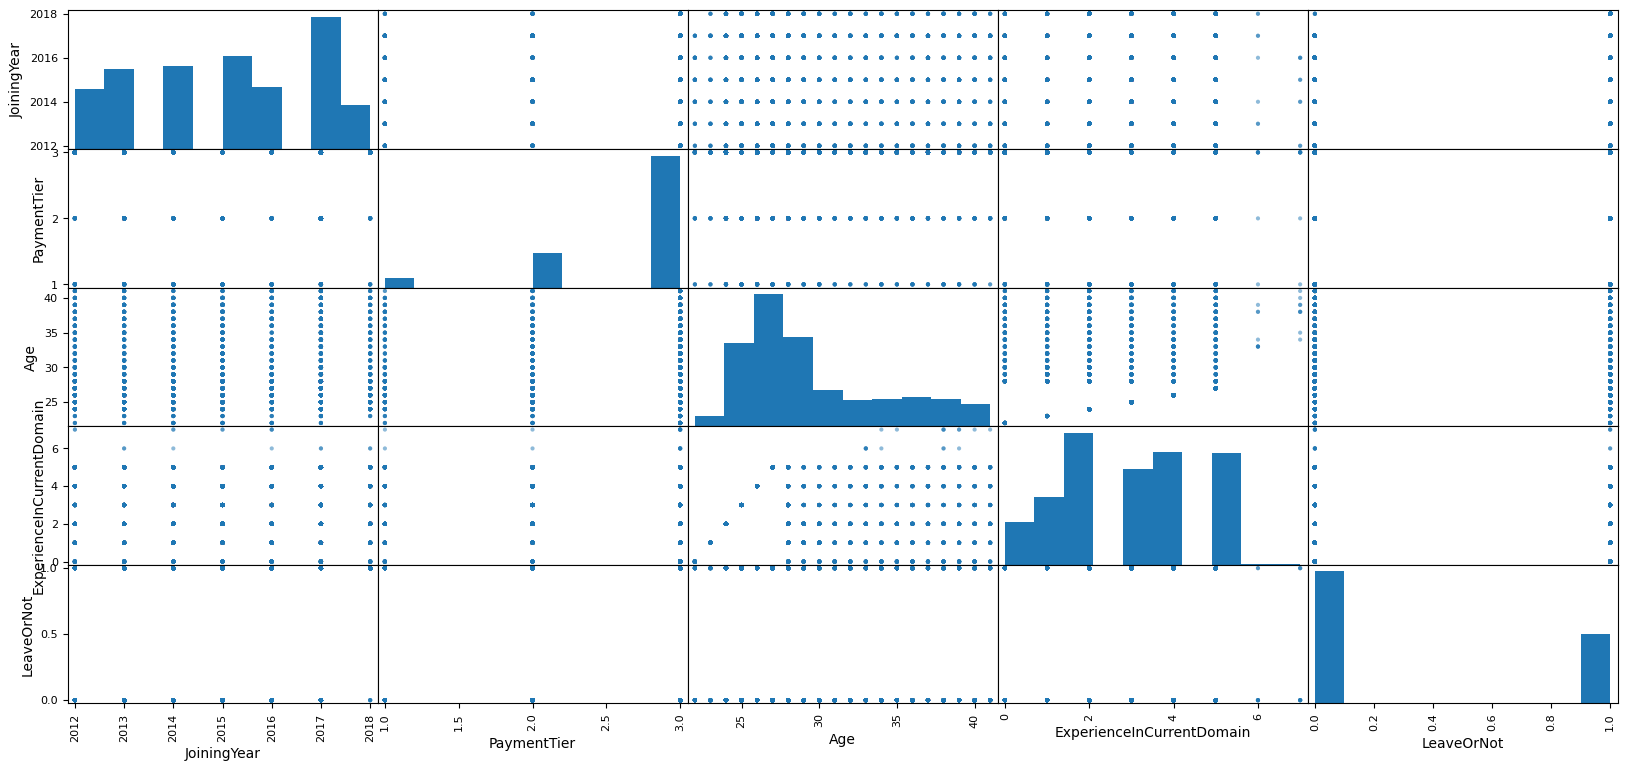

In [7]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt


scatter_matrix(employee[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']], figsize=(20,9))
plt.show()

Can you can see there not type of relation that we can really see, so we can just is what type of empolyee would say or be with the company

<function matplotlib.pyplot.show(close=None, block=None)>

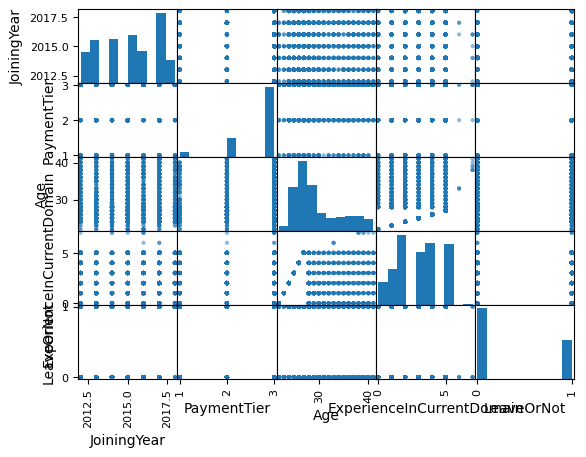

In [8]:
from sklearn.model_selection import train_test_split

employee_train, employee_test = train_test_split(employee, train_size=0.8, random_state = 42)
employee_train, employee_val = train_test_split(employee_train, train_size = 0.8, random_state = 42)

scatter_matrix(employee_train)
plt.show

---

In [9]:
numeric_columns = ['Age','JoiningYear']

one_hot_columns = ['Education', 'City' ,'ExperienceInCurrentDomain']
ord_columns = ['Gender', 'EverBenched',  'PaymentTier']


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

one_hot_encoder = OneHotEncoder(sparse_output = False)
one_hot_encoder.fit_transform(employee_train[one_hot_columns])

# employee = one_hot_encoder.fit_transform(employee_train[one_hot_columns])

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [10]:
ord_encoder = OrdinalEncoder()
ord_encoder.fit_transform(employee_train[ord_columns])

array([[1., 0., 2.],
       [0., 0., 2.],
       [0., 0., 1.],
       ...,
       [1., 0., 2.],
       [1., 0., 2.],
       [1., 0., 0.]])

In [11]:
# ord_encoder = OrdinalEncoder(categories = [['Male', 'Female'], ['No', 'Yes']])
# ord_encoder.fit_transform(employee_train[ord_columns])

---

In [12]:
standard_scalar = StandardScaler()
standard_scalar.fit_transform(employee_train[numeric_columns])

array([[-0.70627549, -1.10705079],
       [-0.08986326, -0.57090467],
       [-0.295334  , -0.03475855],
       ...,
       [-1.11721699, -1.10705079],
       [-0.295334  ,  1.0375337 ],
       [ 1.55390271, -0.57090467]])

---

In [13]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("scale", StandardScaler())
])

one_hot_pipeline = Pipeline([
    ("encode", OneHotEncoder())
])

ord_pipeline = Pipeline([
    ("ordinal", OrdinalEncoder())
])

---

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

preprocessing = ColumnTransformer([
    ("numeric", num_pipeline, numeric_columns),
    ("one_hot", one_hot_pipeline, one_hot_columns),
    ("ord_encode", ord_pipeline, ord_columns)
])

model_linregress = Pipeline([
    ('preprocessing', preprocessing),
    ('model', LinearRegression())
])


 ### you have to remeber to take out the data for LeaveOrNot and then do you
 ### prediction and then do your prediction and thwen do the tree, k-neigbor,
 ### and then and do the then part 2 and 3 is not bad

In [15]:
#X = employee_train
#X = X.drop('LeaveOrNot', axis = 1)

X = employee_train.drop('LeaveOrNot', axis = 1)
y = employee_train['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model_linregress.fit(X, y)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'JoiningYear']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  ['Education', 'City',
                                                   'ExperienceInCurrentDomain']),
                                                 ('ord_encode',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'EverBenched',
                                                   'PaymentTier'])])),
                ('model', LinearRegression())])

In [16]:
y_pred = model_linregress.predict(employee_val.drop('LeaveOrNot', axis = 1))

In [17]:
from sklearn import metrics

metrics.mean_squared_error(employee_val['LeaveOrNot'], y_pred, squared = False)


0.43355240271335416

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

model_rf = Pipeline([
    ('preprocessing', preprocessing),
    ('model', RandomForestRegressor())
])



In [19]:
model_rf.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'JoiningYear']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  ['Education', 'City',
                                                   'ExperienceInCurrentDomain']),
                                                 ('ord_encode',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'EverBenched',
                                                   'PaymentTier'])])),
                ('model', RandomForestRegressor())])

In [20]:
y_pred = model_rf.predict(employee_val.drop('LeaveOrNot', axis = 1))
metrics.mean_squared_error(employee_val['LeaveOrNot'], y_pred, squared = False)

0.35792674279288317

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, y)

# prediction = clf.predict()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [22]:
metrics.precision_score(y_test, y_pred)


0.9142857142857143

In [23]:
metrics.recall_score(y_test, y_pred)

0.9230769230769231

In [24]:
metrics.f1_score(y_test, y_pred)

0.9186602870813396

In [46]:
import numpy as np

question = y_pred == 1
question

array([False,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False,

In [49]:
count = np.count_nonzero(question)
count/len(question)

0.505

In [44]:
question = y_pred == 0
question

array([ True, False, False,  True,  True, False,  True, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True,

In [50]:
count = np.count_nonzero(question)
count/len(question)

0.505

In [45]:
question = y_pred == y_test
question

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# clf.predict(X)
# print(metrics.accuracy_score())

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.915


In [27]:
from sklearn.neighbors import KNeighborsClassifier

K_neigh = KNeighborsClassifier(n_neighbors = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
K_neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
KNeighborsClassifier(...)
K_neigh.predict([[0,0,1,1]])

array([1])

In [29]:
metrics.recall_score(y_test, y_pred)

0.5164835164835165

In [30]:
metrics.precision_score(y_test, y_pred)

0.44761904761904764

In [31]:
metrics.f1_score(y_test, y_pred)

0.4795918367346939

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.49


In [53]:
question = y_pred == 1
question

array([False,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False,

In [54]:
count = np.count_nonzero(question)
count/len(question)

0.505

In [55]:
question = y_pred == 0
question

array([ True, False, False,  True,  True, False,  True, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True,

In [56]:
count = np.count_nonzero(question)
count/len(question)

0.495

In [57]:
question = y_pred == y_test
question

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)



In [34]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.935


In [35]:
metrics.precision_score(y_test, y_pred)

0.9603960396039604

In [36]:
metrics.recall_score(y_test, y_pred)

0.9150943396226415

In [37]:
metrics.f1_score(y_test, y_pred)
# THe Visualizing SCore will be in the exam
# WIth binary Classification, you only take the ture and false array  for exapmle y = y == 5

#Muilt- CLass will give you one answer
#Muilt - label will give you muilt answer


# REGRESSSIOM
# how to train linear regression models
#

#^Y = h(x) = 0x is like an metrix so

# 0 = (1 ,2 3, 4 ,5)
#                  x
                  # 1             0xx
                  # 2
                  # 3
                  # 4

# on the slide 'SOme 0 are better than other'
# # the middle line is the lower possible error
# reemeber its is from left to right

# BIg nuber of training data about and have alot of feature it will take a alot
#time ton calu


# Int the slide The NOrmal Equation : Lniitation
# Both grapoh are the same
# one of then we are looking of the MAE or where the slop where 0 is and the
# other one the slop is unfined so you have to find the lowest point which
# is called Gradient Descent

#GRADIENT DESCENT
#  walking in the best direction that we can to get the lowest point but
#4 its alomost a guessing game



0.9371980676328503

In [58]:
question = y_pred == 1
question

array([False,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False,

In [59]:
count = np.count_nonzero(question)
count/len(question)

0.505

In [60]:
question = y_pred == 0
question

array([ True, False, False,  True,  True, False,  True, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True,

In [61]:
count = np.count_nonzero(question)
count/len(question)

0.495

In [62]:
question = y_pred == y_test
question

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,